In [1]:
%matplotlib ipympl 

#import sys
#sys.path.insert(1, '/project/f/fherwig/fherwig/PythonVirtual/NuGridPy')

import numpy as np
from matplotlib import pyplot as plt

from nugridpy import nugridse as nuse
from nugridpy import utils

import os
import sys
import contextlib
import pandas as pd

import h5py

from matplotlib import colors as mcolors
from matplotlib.ticker import MaxNLocator

from astropy import constants as const
from astropy import units as u

from IPython.display import display
import ipywidgets as widgets
import matplotlib.patches as patches

from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
import ipywidgets as widgets
import matplotlib.patches as patches

# important feature!
from multizone import mppnp_reader
import multizone_plot as mzp

In [2]:
aesthetics = {"MLT": 
                  {"markers": ['^', 'D','s','o'],
                   "colours": ['midnightblue','blue','cornflowerblue','tab:blue'],
                   "case_label": "MLT",
                   "linestyle": "solid",
                   "folders": ["0.00E+00", "7.95E+01", "7.95E+02", "7.95E+03"],
                   "ilabs": ['No Merger', r'$4\times10^{-5}~\mathrm{M}_\odot \mathrm{s^{-1}}$',r'$4\times10^{-4}~\mathrm{M}_\odot \mathrm{s^{-1}}$',r'$4\times10^{-3}~\mathrm{M}_\odot \mathrm{s^{-1}}$']},
              
              "PPM":
                  {"markers": ['^', 'o','s','D'],
                   "colours": ['darkorange','chocolate','orange','tab:orange'],
                   "case_label": r"$D_{\mathrm{3D{-}insp.}}$",
                   "linestyle": "dashed",
                   "folders": ["0.00E+00", "7.95E+01", "7.95E+02", "7.95E+03"],
                   "ilabs": ['No Merger', r'$4\times10^{-5}~\mathrm{M}_\odot \mathrm{s^{-1}}$',r'$4\times10^{-4}~\mathrm{M}_\odot \mathrm{s^{-1}}$',r'$4\times10^{-3}~\mathrm{M}_\odot \mathrm{s^{-1}}$']},
              
              "PPM3":
                  {"markers": ['^', 'o','D','s'],
                   "colours": ['darkgreen','seagreen','lime','tab:green'],
                   "case_label": r"$3\times D_{\mathrm{3D{-}insp.}}$",
                   "linestyle": "dotted",
                   "folders": ["0.00E+00", "7.95E+01", "7.95E+02", "7.95E+03"],
                   "ilabs": ['No Merger', r'$4\times10^{-5}~\mathrm{M}_\odot \mathrm{s^{-1}}$',r'$4\times10^{-4}~\mathrm{M}_\odot \mathrm{s^{-1}}$',r'$4\times10^{-3}~\mathrm{M}_\odot \mathrm{s^{-1}}$']},

              "PPM10":
                  {"markers": ['s', 'o','D','^'],
                   "colours": ['darkred','firebrick','indianred','tab:red'],
                   "case_label": r"$10\times D_{\mathrm{3D{-}insp.}}$",
                   "linestyle": "solid",
                   "folders": ["0.00E+00", "7.95E+01", "7.95E+02", "7.95E+03"],
                   "ilabs": ['No Merger', r'$4\times10^{-5}~\mathrm{M}_\odot \mathrm{s^{-1}}$',r'$4\times10^{-4}~\mathrm{M}_\odot \mathrm{s^{-1}}$',r'$4\times10^{-3}~\mathrm{M}_\odot \mathrm{s^{-1}}$']},
             
              "PPM50":
                  {"markers": ['s', 'o','D','v'],
                   "colours": ['rebeccapurple','mediumorchid','plum','tab:purple'],
                   "case_label": r"$50\times D_{\mathrm{3D{-}insp.}}$",
                   "linestyle": "dashed",
                   "folders": ["0.00E+00", "7.95E+01", "7.95E+02", "7.95E+03"],
                   "ilabs": ['No Merger', r'$4\times10^{-5}~\mathrm{M}_\odot \mathrm{s^{-1}}$',r'$4\times10^{-4}~\mathrm{M}_\odot \mathrm{s^{-1}}$',r'$4\times10^{-3}~\mathrm{M}_\odot \mathrm{s^{-1}}$']},
              
              "GOSH":
                  {"markers": ['D', 's', '^', 'v'],
                   "colours": ['tab:orange','lightskyblue','chocolate','dimgrey'],
                   "case_label": "Quenched",
                   "linestyle": "dotted",
                   "folders": ["gosh", "gosh_stronger", "partial_merger", "partial_merger_stronger"],
                   "ilabs": ["GOSH-like", "Stronger GOSH-like", "Partial Merger", "Stronger Partial Merger"]
                  }
              

}

In [3]:
for run in aesthetics.keys():
    res = []
    for ing in aesthetics[run]["folders"]:

        if run != 'GOSH':
            obj = mppnp_reader(initialpath = "/data/niagara_project/projects/ocmerger_issa2025/CONDITIONS/initial_abund.dat",
                                surfpath = f"/data/niagara_project/projects/ocmerger_issa2025/RUNS/{run}_RUNS/hif{ing}/H5_surf")
        else:
            obj = mppnp_reader(initialpath = "/data/niagara_project/projects/ocmerger_issa2025/CONDITIONS/initial_abund.dat",
                        surfpath = f"/data/niagara_project/projects/ocmerger_issa2025/RUNS/{run}_RUNS/{ing}/H5_surf")
            
        res.append(obj)
        
    aesthetics[run]['results'] = res

In [4]:
pnuclei = [
    'Se-74', 'Kr-78', 'Sr-84', 'Mo-92', 'Mo-94',
    'Ru-96', 'Ru-98', 'Pd-102', 'Cd-106', 'Cd-108',
    'In-113', 'Sn-112', 'Sn-114', 'Sn-115',
    'Te-120', 'Xe-124', 'Xe-126',
    'Ba-130', 'Ba-132', 'La-138', 'Ce-136', 'Ce-138',
    'Sm-144', 'Gd-152', 'Dy-156',
    'Dy-158', 'Er-162', 'Er-164', 'Yb-168', 'Hf-174',
    'Ta-180', 'W-180', 'Os-184', 'Pt-190', 'Hg-196'
]

In [5]:
mzp.overproduction_plot?

Signature:
mzp.overproduction_plot(
    ifig,
    objs,
    cycle,
    isotopes,
    OP_type=None,
    x_as_massnumber=False,
    lines=False,
    **kwargs,
)
Docstring:
Plot overproduction factors for all isotopes.

Parameters
----------
ifig: integer
    The figure number.

objs: mppnp_reader objects or list of mppnp_reader objects
    The mppnp simulations to plot read in as mppnp_reader objects from multizone.py
    
cycle: float
    The cycle to plot the OP for.

isotopes: string or list
    The isotopes to plot with OP.
    
OP_type: string
    Possible inputs:
        solar:  OP = log10( X/Xsolar )
        intial: OP = log10( X/Xinitial )
        ingest: OP = log10( X/Xingested )
    Default: None, plot as log10(X)
    
x_as_massnumber: boolean
    If False, isotopes will be plotted sequentially.
    If True,  isotopes will be plotted according to their mass number A.
    
lines: boolean
    If False, isotopes will be plotted individually.
    If True,  isotopes of the same elem

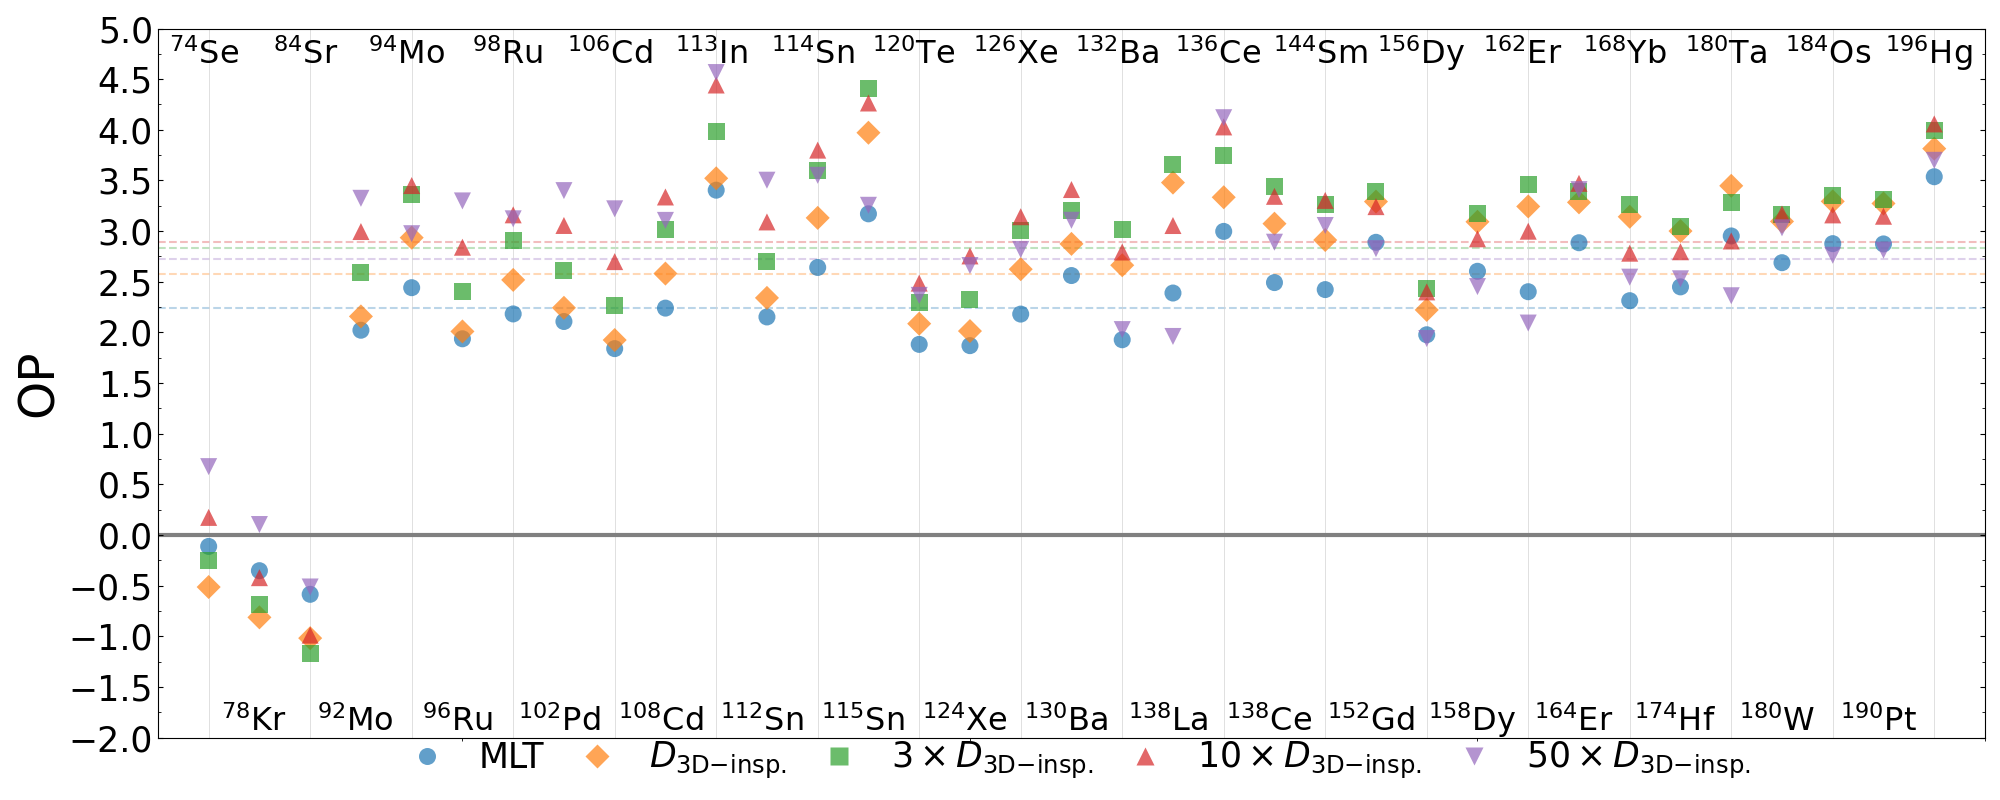

In [15]:
to_plot = [ aesthetics[run]['results'][3] for run in ['MLT', 'PPM', 'PPM3', 'PPM10', 'PPM50'] ]

labels = [ aesthetics[run]['case_label'] for run in ['MLT', 'PPM', 'PPM3', 'PPM10', 'PPM50']]

markers = [ aesthetics[run]['markers'][3] for run in ['MLT', 'PPM', 'PPM3', 'PPM10', 'PPM50']]

colours = [ aesthetics[run]['colours'][3] for run in ['MLT', 'PPM', 'PPM3', 'PPM10', 'PPM50']]

mzp.overproduction_plot(1, to_plot, 11000, pnuclei, OP_type='initial', ymin=-2, ymax=5, labels=labels, markers=markers, colours=colours, alpha=0.7)

plt.axhline(2.24, color=colours[0], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.58, color=colours[1], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.83, color=colours[2], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.89, color=colours[3], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.72, color=colours[4], zorder=-1, alpha=0.3, linestyle='dashed')

plt.savefig('../figures/impact_mixing_cases.pdf')

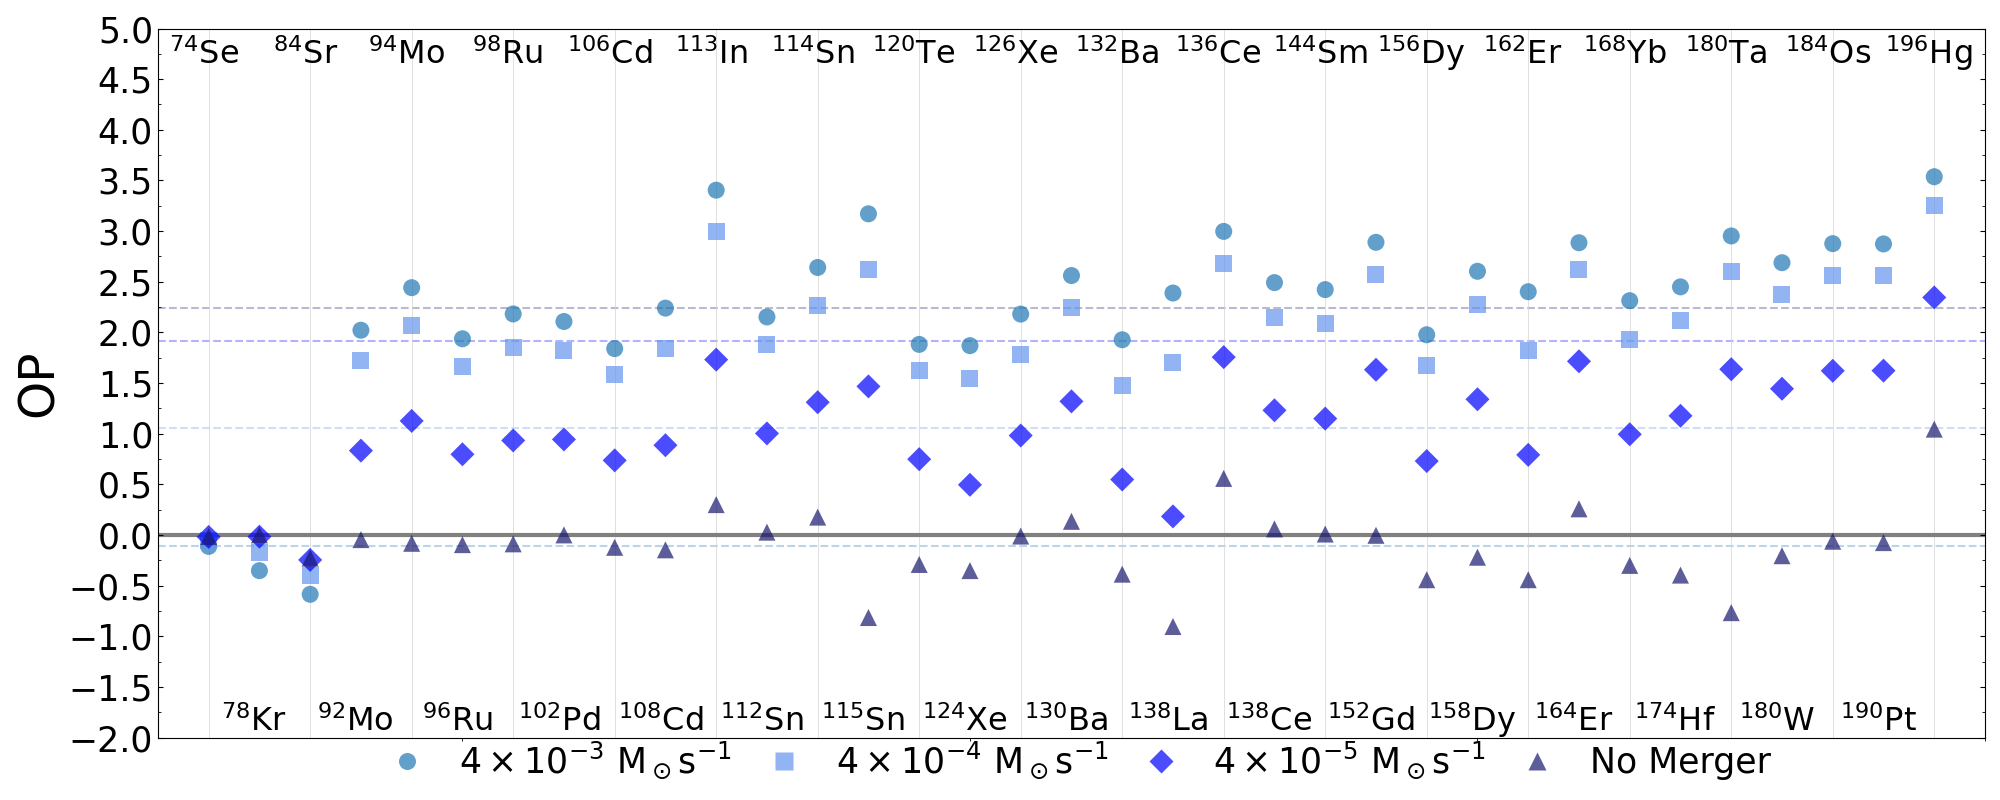

In [14]:
to_plot = aesthetics["MLT"]['results'][::-1]

labels = aesthetics["MLT"]['ilabs'][::-1]

markers = aesthetics["MLT"]['markers'][::-1]

colours = aesthetics["MLT"]['colours'][::-1]

mzp.overproduction_plot(2, to_plot, 11000, pnuclei, OP_type='initial', ymin=-2, ymax=5, labels=labels, markers=markers, colours=colours, alpha=0.7)


plt.axhline(-0.11, color=colours[0], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(1.06, color=colours[1], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(1.92, color=colours[2], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.24, color=colours[3], zorder=-1, alpha=0.3, linestyle='dashed')

plt.savefig('../figures/ingest_MLT.pdf')

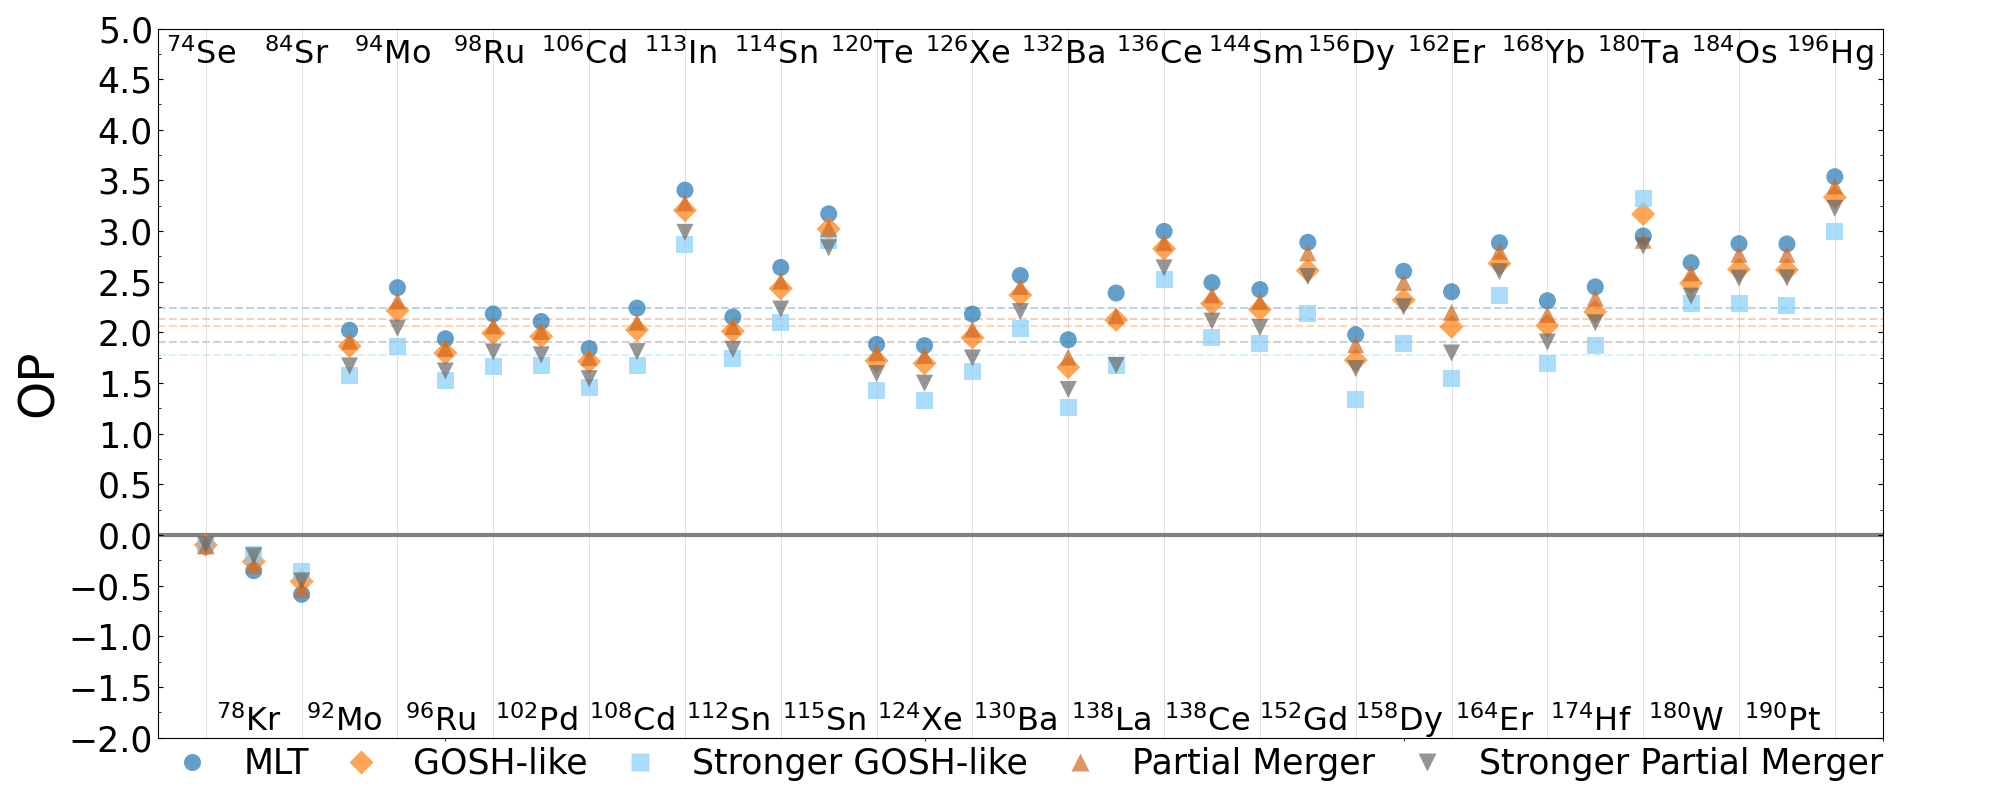

In [13]:
to_plot = [ aesthetics["MLT"]['results'][3] ] + aesthetics["GOSH"]['results']

labels =  [ aesthetics["MLT"]['case_label'] ] + aesthetics["GOSH"]['ilabs']

markers = [ aesthetics["MLT"]['markers'][3] ] + aesthetics["GOSH"]['markers']

colours = [ aesthetics["MLT"]['colours'][3] ] + aesthetics["GOSH"]['colours']

mzp.overproduction_plot(3, to_plot, 11000, pnuclei, OP_type='initial', ymin=-2, ymax=5, labels=labels, markers=markers, colours=colours, alpha=0.7)

plt.axhline(2.24, color=colours[0], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.06, color=colours[1], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(1.78, color=colours[2], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.13, color=colours[3], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(1.91, color=colours[4], zorder=-1, alpha=0.3, linestyle='dashed')


plt.savefig('../figures/impact_mixing_GOSH_partial.pdf')

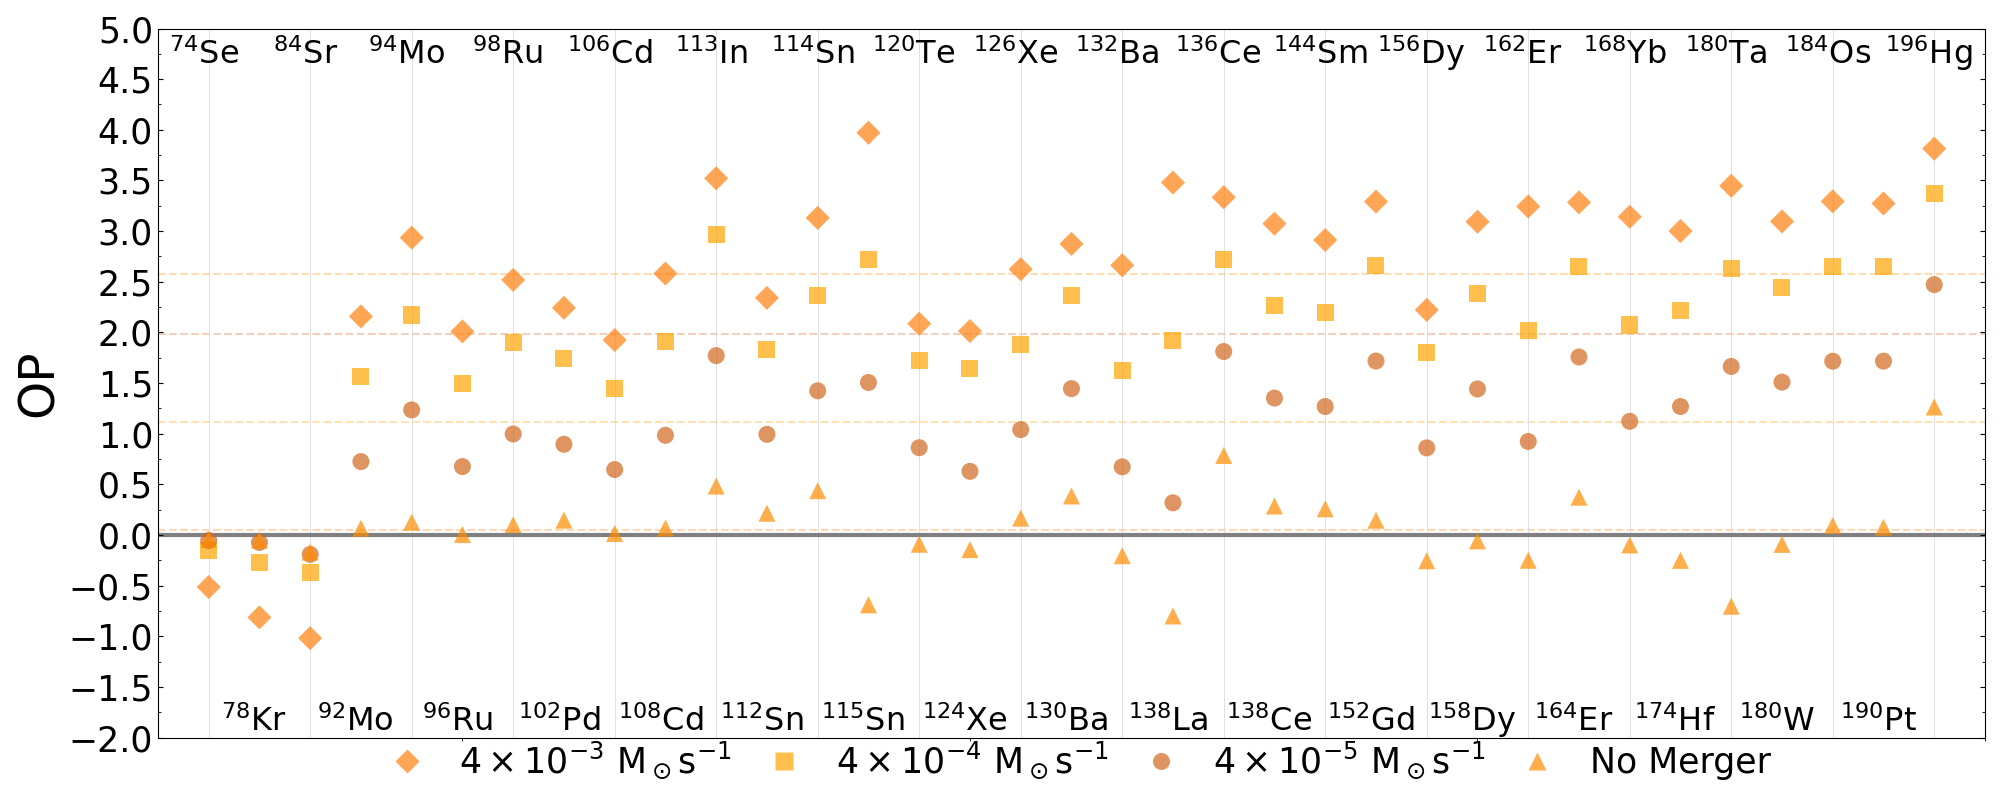

In [16]:
to_plot = aesthetics["PPM"]['results'][::-1]

labels = aesthetics["PPM"]['ilabs'][::-1]

markers = aesthetics["PPM"]['markers'][::-1]

colours = aesthetics["PPM"]['colours'][::-1]

mzp.overproduction_plot(4, to_plot, 11000, pnuclei, OP_type='initial', ymin=-2, ymax=5, labels=labels, markers=markers, colours=colours, alpha=0.7)


plt.axhline(0.05, color=colours[0], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(1.12, color=colours[1], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(1.98, color=colours[2], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.58, color=colours[3], zorder=-1, alpha=0.3, linestyle='dashed')

plt.savefig('../figures/ingest_3D.pdf')

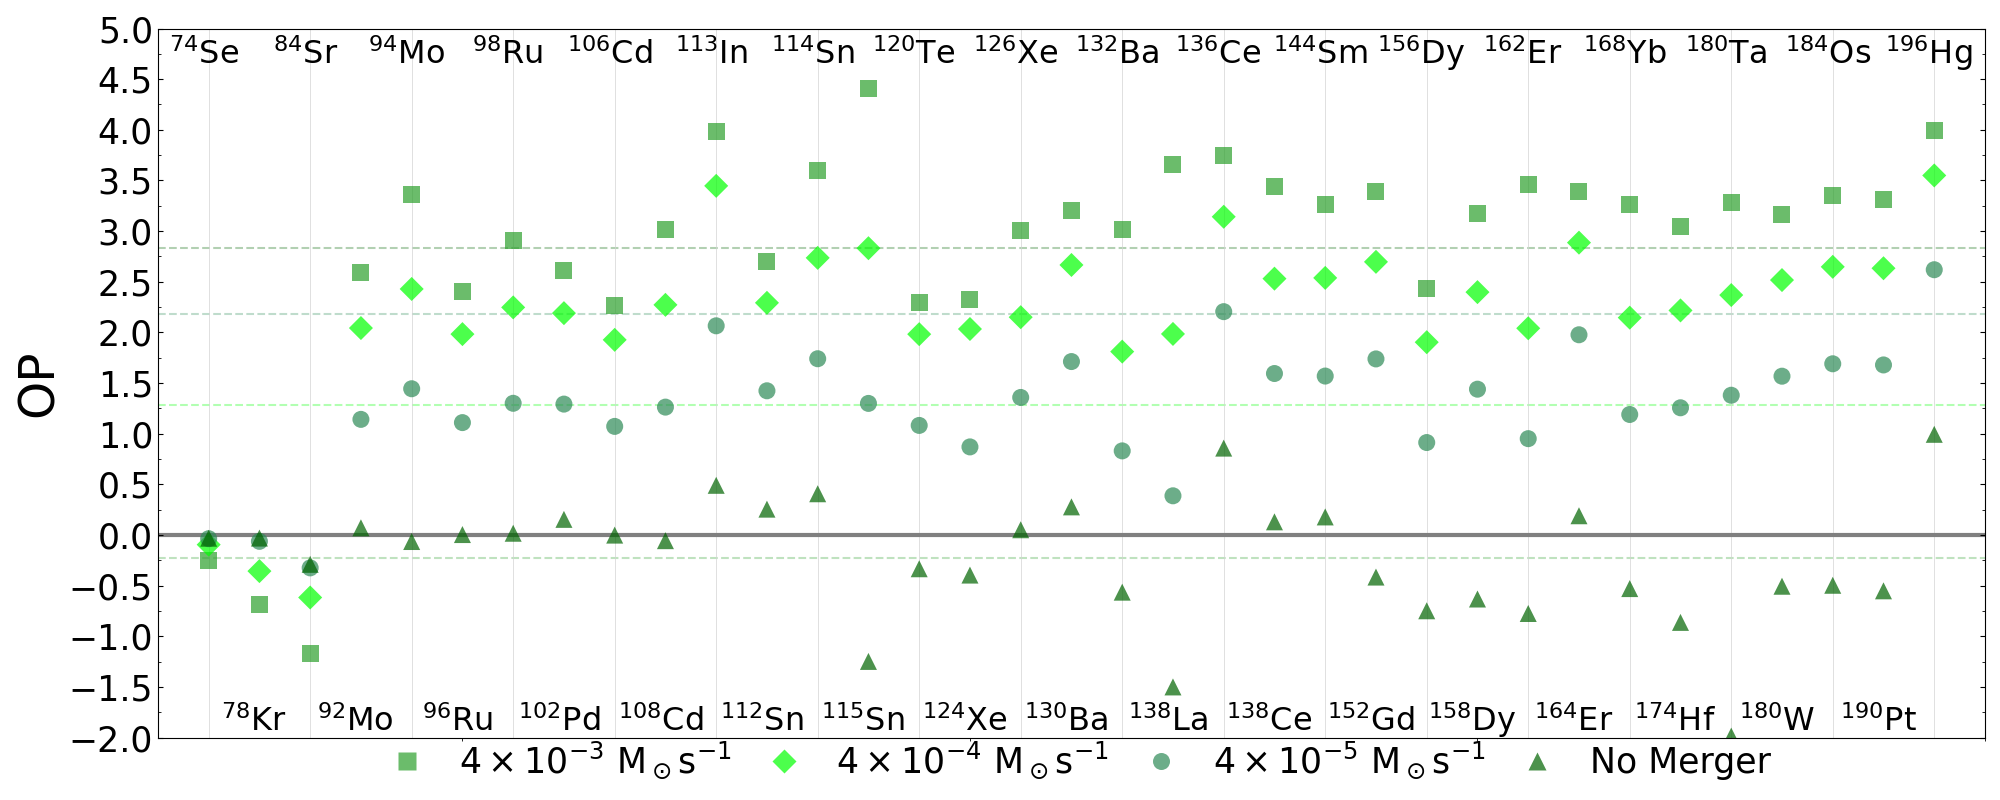

In [17]:
to_plot = aesthetics["PPM3"]['results'][::-1]

labels = aesthetics["PPM3"]['ilabs'][::-1]

markers = aesthetics["PPM3"]['markers'][::-1]

colours = aesthetics["PPM3"]['colours'][::-1]

mzp.overproduction_plot(5, to_plot, 11000, pnuclei, OP_type='initial', ymin=-2, ymax=5, labels=labels, markers=markers, colours=colours, alpha=0.7)


plt.axhline(-0.23, color=colours[0], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(1.28, color=colours[1], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.18, color=colours[2], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.83, color=colours[3], zorder=-1, alpha=0.3, linestyle='dashed')

plt.savefig('../figures/ingest_3x3D.pdf')

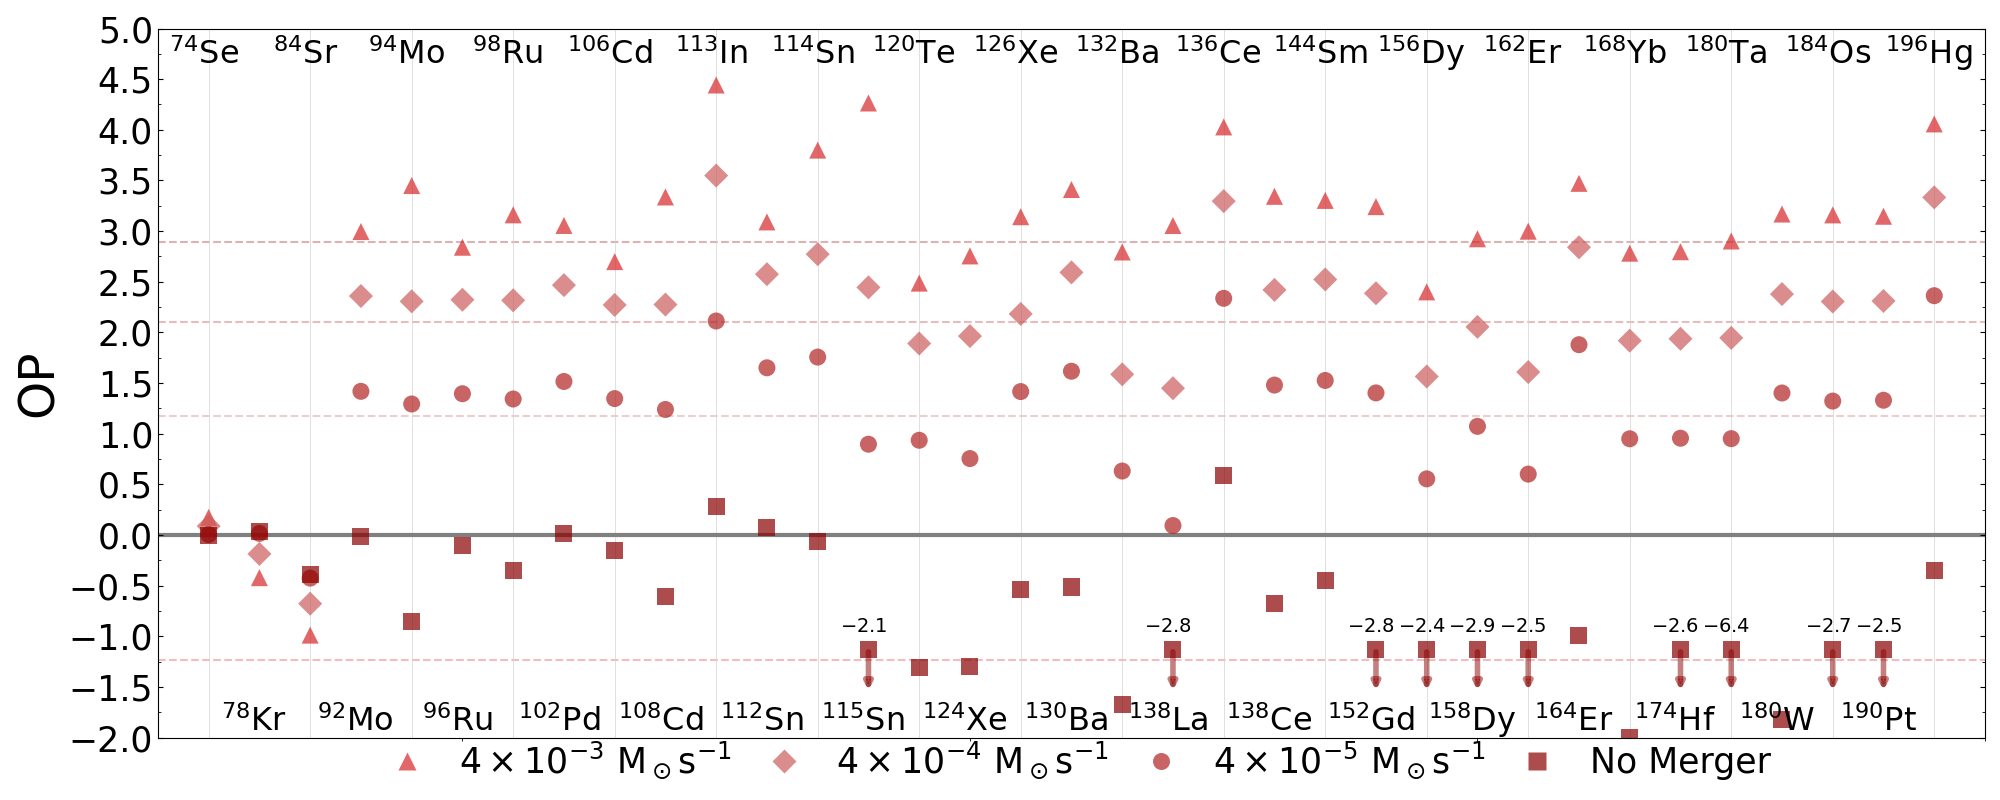

In [18]:
to_plot = aesthetics["PPM10"]['results'][::-1]

labels = aesthetics["PPM10"]['ilabs'][::-1]

markers = aesthetics["PPM10"]['markers'][::-1]

colours = aesthetics["PPM10"]['colours'][::-1]

mzp.overproduction_plot(6, to_plot, 11000, pnuclei, OP_type='initial', ymin=-2, ymax=5, labels=labels, markers=markers, colours=colours, alpha=0.7)


plt.axhline(-1.23, color=colours[0], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(1.18, color=colours[1], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.10, color=colours[2], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.89, color=colours[3], zorder=-1, alpha=0.3, linestyle='dashed')

plt.savefig('../figures/ingest_10x3D.pdf')

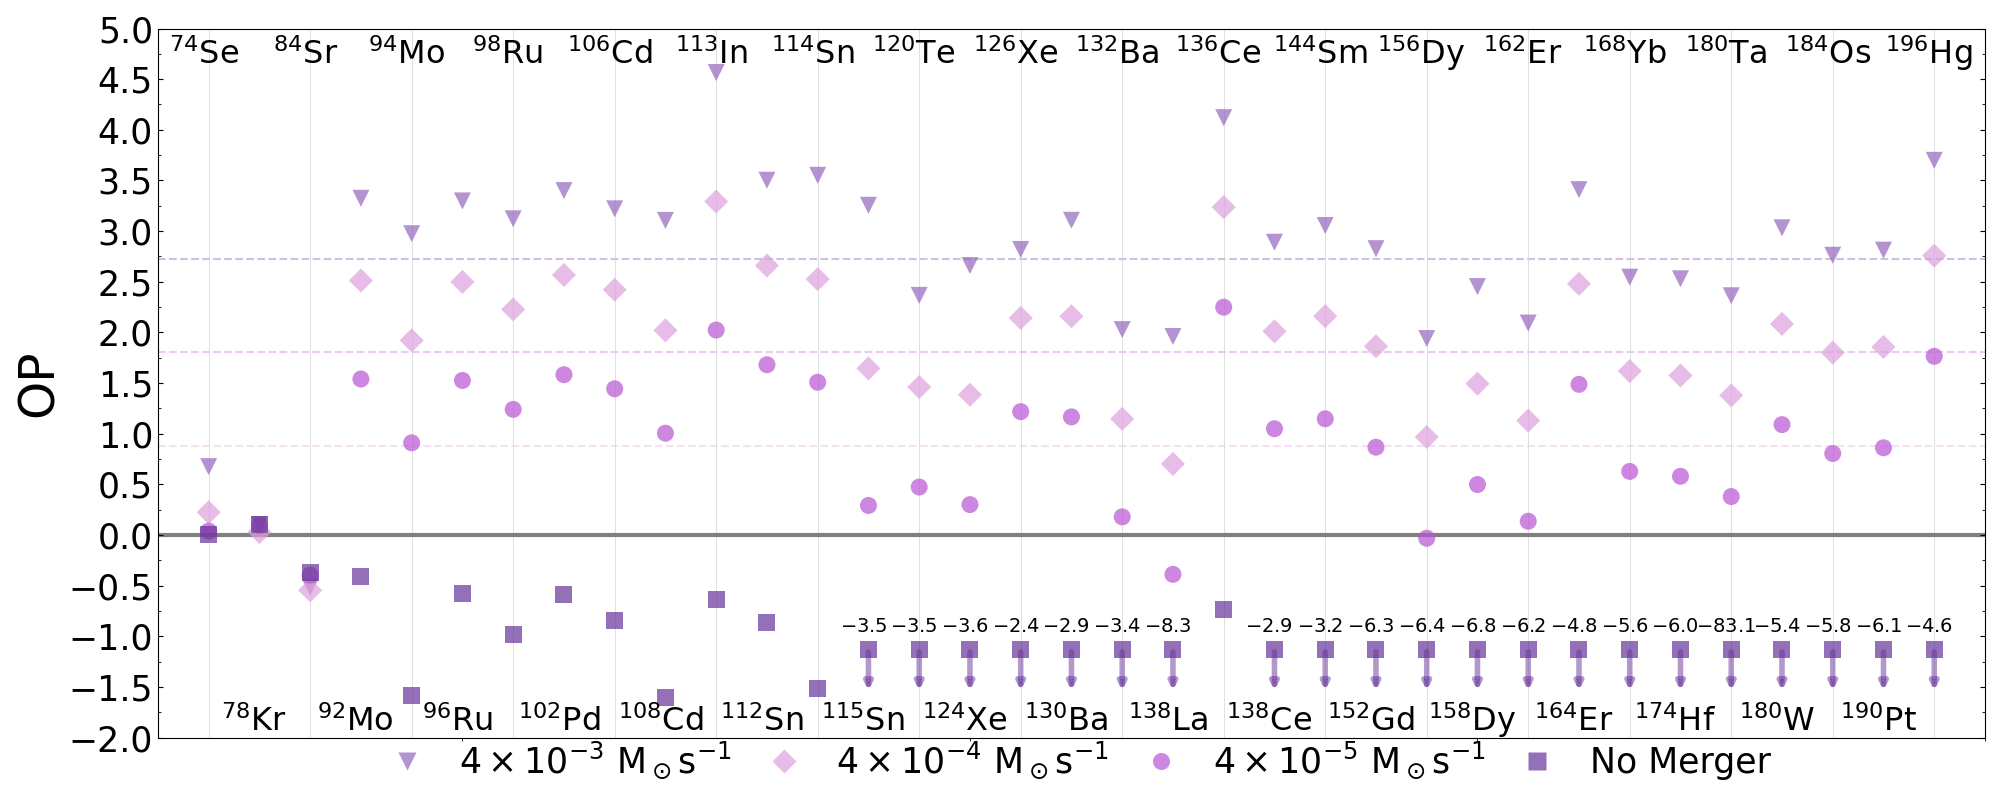

In [19]:
to_plot = aesthetics["PPM50"]['results'][::-1]

labels = aesthetics["PPM50"]['ilabs'][::-1]

markers = aesthetics["PPM50"]['markers'][::-1]

colours = aesthetics["PPM50"]['colours'][::-1]

mzp.overproduction_plot(7, to_plot, 11000, pnuclei, OP_type='initial', ymin=-2, ymax=5, labels=labels, markers=markers, colours=colours, alpha=0.7)


plt.axhline(0.88, color=colours[1], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(1.81, color=colours[2], zorder=-1, alpha=0.3, linestyle='dashed')
plt.axhline(2.72, color=colours[3], zorder=-1, alpha=0.3, linestyle='dashed')

plt.savefig('../figures/ingest_50x3D.pdf')